In [260]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

base_path = "data"
dataset_csv_path = os.path.join(base_path,"data.csv")
dataset_description_csv_path = os.path.join(base_path,"data_description.xlsx")


In [261]:
import pandas as pd

dataset = pd.read_csv(dataset_csv_path, index_col=0, parse_dates=True, dtype='float64')
dataset_description = pd.read_excel(dataset_description_csv_path, dtype='string')
dataset_description.fillna('')
dataset_description.drop_duplicates(subset=['Name'], inplace=True)
dataset_description.set_index('Name', inplace=True)

dataset = dataset.set_index(pd.to_datetime(dataset.index))
dataset.columns = pd.MultiIndex.from_frame(dataset_description.loc[dataset.columns, ['Location', 'Custom Name']])
dataset.head()



Location               Tank 1                                              \
Custom Name           O2 perc pH regulator in flow Sludge recycle in flow   
2022-01-01 00:00:00  18.49650             18.81396               100.0696   
2022-01-01 00:05:00  18.49731             18.70401               100.0715   
2022-01-01 00:10:00  18.49693             18.59405               100.0733   
2022-01-01 00:15:00  18.49603             18.48410               100.0751   
2022-01-01 00:20:00  18.49512             18.37415               100.0770   

Location                                                                    \
Custom Name         Air in flow Content height pH measurement FR        pH   
2022-01-01 00:00:00    618.6791            NaN          1931.360  7.272931   
2022-01-01 00:05:00    613.7349            NaN          1929.365  7.273591   
2022-01-01 00:10:00    608.7906            NaN          1924.322  7.274251   
2022-01-01 00:15:00    603.8464            NaN          1919.279  7.274910   
2022-01-01 00:20:00    598.9022            NaN          1914.235  7.275570   

Location                                                        ...  \
Custom Name         O2 measurement FR O2 dissolved Temperature  ...   
2022-01-01 00:00:00          1878.295     1.549485    27.25480  ...   
2022-01-01 00:05:00          1878.252     1.552745    27.25177  ...   
2022-01-01 00:10:00          1878.209     1.556006    27.24874  ...   
2022-01-01 00:15:00          1878.167     1.559266    27.24572  ...   
2022-01-01 00:20:00          1878.124     1.562526    27.24269  ...   

Location                 Input A                         Input B            \
Custom Name         Conductivity       TOC        pH Temperature  Flowrate   
2022-01-01 00:00:00     60.10090  7.385031  7.081979    27.39823  20.89696   
2022-01-01 00:05:00     60.09105  7.375766  7.136544    27.07825  26.92165   
2022-01-01 00:10:00     60.08120  7.366502  7.085941    26.75828  14.01370   
2022-01-01 00:15:00     60.07135  7.357237  6.743883    26.50328   5.78938   
2022-01-01 00:20:00     60.06150  7.347972  6.621848    26.29828  39.27962   

Location                                                          Exit  
Custom Name         Amount of sludge Conductivity TOC        pH Target  
2022-01-01 00:00:00         260.1674     2.193955 NaN  6.236635    NaN  
2022-01-01 00:05:00         259.9575     2.187813 NaN  6.238485    NaN  
2022-01-01 00:10:00         259.7475     2.181671 NaN  6.240336    NaN  
2022-01-01 00:15:00         259.5375     2.175529 NaN  6.242187    NaN  
2022-01-01 00:20:00         259.3275     2.169388 NaN  6.244037    NaN  

[5 rows x 36 columns]

In [262]:

from scipy import stats

def get_general_stats(dataset):
    all_stats = pd.DataFrame(index=dataset.columns, columns=['min', 'max', 'mean', 'std', 'median', 'count', 'missing', 'missing %', 'z-score', 'skew', 'normaltest'])
    for col in dataset.columns:
        all_stats.loc[col, 'min'] = dataset[col].min()
        all_stats.loc[col, 'max'] = dataset[col].max()
        all_stats.loc[col, 'mean'] = dataset[col].mean()
        all_stats.loc[col, 'std'] = dataset[col].std()
        all_stats.loc[col, 'median'] = dataset[col].median()
        all_stats.loc[col, 'count'] = dataset[col].count()
        all_stats.loc[col, 'missing'] = dataset[col].isna().sum()
        all_stats.loc[col, 'missing %'] = dataset[col].isna().sum() / dataset[col].count()
        all_stats.loc[col, 'z-score'] = stats.zscore(dataset[col])
        all_stats.loc[col, 'skew'] = stats.skew(dataset[col])
        all_stats.loc[col, 'normaltest'] = stats.normaltest(dataset[col])[1]
    return all_stats

In [263]:
stats.zscore(dataset)

Location             Tank 1                                              \
Custom Name         O2 perc pH regulator in flow Sludge recycle in flow   
2022-01-01 00:00:00     NaN                  NaN                    NaN   
2022-01-01 00:05:00     NaN                  NaN                    NaN   
2022-01-01 00:10:00     NaN                  NaN                    NaN   
2022-01-01 00:15:00     NaN                  NaN                    NaN   
2022-01-01 00:20:00     NaN                  NaN                    NaN   
...                     ...                  ...                    ...   
2022-09-23 13:25:00     NaN                  NaN                    NaN   
2022-09-23 13:30:00     NaN                  NaN                    NaN   
2022-09-23 13:35:00     NaN                  NaN                    NaN   
2022-09-23 13:40:00     NaN                  NaN                    NaN   
2022-09-23 13:45:00     NaN                  NaN                    NaN   

Location                                                              \
Custom Name         Air in flow Content height pH measurement FR  pH   
2022-01-01 00:00:00         NaN            NaN               NaN NaN   
2022-01-01 00:05:00         NaN            NaN               NaN NaN   
2022-01-01 00:10:00         NaN            NaN               NaN NaN   
2022-01-01 00:15:00         NaN            NaN               NaN NaN   
2022-01-01 00:20:00         NaN            NaN               NaN NaN   
...                         ...            ...               ...  ..   
2022-09-23 13:25:00         NaN            NaN               NaN NaN   
2022-09-23 13:30:00         NaN            NaN               NaN NaN   
2022-09-23 13:35:00         NaN            NaN               NaN NaN   
2022-09-23 13:40:00         NaN            NaN               NaN NaN   
2022-09-23 13:45:00         NaN            NaN               NaN NaN   

Location                                                        ...  \
Custom Name         O2 measurement FR O2 dissolved Temperature  ...   
2022-01-01 00:00:00               NaN          NaN         NaN  ...   
2022-01-01 00:05:00               NaN          NaN         NaN  ...   
2022-01-01 00:10:00               NaN          NaN         NaN  ...   
2022-01-01 00:15:00               NaN          NaN         NaN  ...   
2022-01-01 00:20:00               NaN          NaN         NaN  ...   
...                               ...          ...         ...  ...   
2022-09-23 13:25:00               NaN          NaN         NaN  ...   
2022-09-23 13:30:00               NaN          NaN         NaN  ...   
2022-09-23 13:35:00               NaN          NaN         NaN  ...   
2022-09-23 13:40:00               NaN          NaN         NaN  ...   
2022-09-23 13:45:00               NaN          NaN         NaN  ...   

Location                 Input A             Input B           \
Custom Name         Conductivity TOC  pH Temperature Flowrate   
2022-01-01 00:00:00          NaN NaN NaN         NaN      NaN   
2022-01-01 00:05:00          NaN NaN NaN         NaN      NaN   
2022-01-01 00:10:00          NaN NaN NaN         NaN      NaN   
2022-01-01 00:15:00          NaN NaN NaN         NaN      NaN   
2022-01-01 00:20:00          NaN NaN NaN         NaN      NaN   
...                          ...  ..  ..         ...      ...   
2022-09-23 13:25:00          NaN NaN NaN         NaN      NaN   
2022-09-23 13:30:00          NaN NaN NaN         NaN      NaN   
2022-09-23 13:35:00          NaN NaN NaN         NaN      NaN   
2022-09-23 13:40:00          NaN NaN NaN         NaN      NaN   
2022-09-23 13:45:00          NaN NaN NaN         NaN      NaN   

Location                                                    Exit  
Custom Name         Amount of sludge Conductivity TOC  pH Target  
2022-01-01 00:00:00              NaN          NaN NaN NaN    NaN  
2022-01-01 00:05:00              NaN          NaN NaN NaN    NaN  
2022-01-01 00:10:00              NaN          NaN

In [264]:
# get_general_stats(dataset)
dataset


Location               Tank 1                                              \
Custom Name           O2 perc pH regulator in flow Sludge recycle in flow   
2022-01-01 00:00:00  18.49650             18.81396              100.06960   
2022-01-01 00:05:00  18.49731             18.70401              100.07150   
2022-01-01 00:10:00  18.49693             18.59405              100.07330   
2022-01-01 00:15:00  18.49603             18.48410              100.07510   
2022-01-01 00:20:00  18.49512             18.37415              100.07700   
...                       ...                  ...                    ...   
2022-09-23 13:25:00  17.86954             41.94464               89.89435   
2022-09-23 13:30:00  17.88018             40.87782               89.92362   
2022-09-23 13:35:00  17.89081             39.81099               89.95290   
2022-09-23 13:40:00  17.90145             38.74416               89.98218   
2022-09-23 13:45:00  17.91208             38.58984               89.99812   

Location                                                                    \
Custom Name         Air in flow Content height pH measurement FR        pH   
2022-01-01 00:00:00    618.6791            NaN          1931.360  7.272931   
2022-01-01 00:05:00    613.7349            NaN          1929.365  7.273591   
2022-01-01 00:10:00    608.7906            NaN          1924.322  7.274251   
2022-01-01 00:15:00    603.8464            NaN          1919.279  7.274910   
2022-01-01 00:20:00    598.9022            NaN          1914.235  7.275570   
...                         ...            ...               ...       ...   
2022-09-23 13:25:00    805.8918       17.45585          1462.229  7.598161   
2022-09-23 13:30:00    804.2576       17.45406          1461.738  7.599618   
2022-09-23 13:35:00    802.6233       17.45228          1460.959  7.601076   
2022-09-23 13:40:00    800.9891       17.45049          1462.083  7.602533   
2022-09-23 13:45:00    799.3548       17.44870          1463.145  7.603990   

Location                                                        ...  \
Custom Name         O2 measurement FR O2 dissolved Temperature  ...   
2022-01-01 00:00:00          1878.295     1.549485    27.25480  ...   
2022-01-01 00:05:00          1878.252     1.552745    27.25177  ...   
2022-01-01 00:10:00          1878.209     1.556006    27.24874  ...   
2022-01-01 00:15:00          1878.167     1.559266    27.24572  ...   
2022-01-01 00:20:00          1878.124     1.562526    27.24269  ...   
...                               ...          ...         ...  ...   
2022-09-23 13:25:00          1883.041     1.639308    19.44436  ...   
2022-09-23 13:30:00          1883.005     1.581313    19.44209  ...   
2022-09-23 13:35:00          1882.969     1.523319    19.43982  ...   
2022-09-23 13:40:00          1882.934     1.465324    19.43755  ...   
2022-09-23 13:45:00          1882.898     1.407330    19.43527  ...   

Location                 Input A                          Input B            \
Custom Name         Conductivity        TOC        pH Temperature  Flowrate   
2022-01-01 00:00:00     60.10090   7.385031  7.081979    27.39823  20.89696   
2022-01-01 00:05:00     60.09105   7.375766  7.136544    27.07825  26.92165   
2022-01-01 00:10:00     60.08120   7.366502  7.085941    26.75828  14.01370   
2022-01-01 00:15:00     60.07135   7.357237  6.743883    26.50328   5.78938   
2022-01-01 00:20:00     60.06150   7.347972  6.621848    26.29828  39.27962   
...                          ...        ...       ...         ...       ...   
2022-09-23 13:25:00     51.72038   3.863174  7.156402    27.69638  37.34892   
2022-09-23 13:30:00     51.14077  16.219060  7.148751    27.69767  35.89980   
2022-09-23 13:35:00     50.56117  14.821500  7.141101    27.69895  47.51368   
2022-09-23 13:40:00     49.98157  12.261280  7.133451    27.70023  48.20868   
2022-09-23 13:45:00     57.16953  16.359960  8.468385    27.70151  58.19659   

Location                       

In [265]:
def plot_data_from_column_using_date_range(column_name, start_date, end_date):
    dataset[column_name].loc[(dataset['TimeStamp'] > start_date) & (dataset['TimeStamp'] < end_date)].plot(figsize=(20,10))

In [266]:
# how many null values are there in each column
dataset.isnull().sum()

Location  Custom Name           
Tank 1    O2 perc                    4526
          pH regulator in flow       5531
          Sludge recycle in flow     5358
          Air in flow                  78
          Content height             9013
          pH measurement FR          5560
          pH                         5622
          O2 measurement FR          5646
          O2 dissolved               5594
          Temperature                5672
Exit      Sludge concentration       5603
          Conductivity               1887
          NO3 Dissolved             43354
Tank 2    O2 perc                    4551
          pH regulator in flow       5284
          Sludge recycle in flow     5336
          Air in flow                  76
          Content height            10121
          pH measurement FR          5593
          pH                         5346
          O2 measurement FR          5588
          O2 dissolved               1587
          Temperature                5582
I

In [267]:
# Data Cleaning and Imputation
# Null Values 
# Method 1: Drop all the rows with null values
dataset.dropna(inplace=True)
dataset.isnull().sum()

# Method 2 : Replace null values with the mean of the column
# # replace all the null values in InputC1 with the mean of the column from the same day
# dataset['InputC1'] = dataset.groupby(dataset['TimeStamp'].dt.date)['InputC1'].transform(lambda x: x.fillna(x.mean()))


Location  Custom Name           
Tank 1    O2 perc                   0
          pH regulator in flow      0
          Sludge recycle in flow    0
          Air in flow               0
          Content height            0
          pH measurement FR         0
          pH                        0
          O2 measurement FR         0
          O2 dissolved              0
          Temperature               0
Exit      Sludge concentration      0
          Conductivity              0
          NO3 Dissolved             0
Tank 2    O2 perc                   0
          pH regulator in flow      0
          Sludge recycle in flow    0
          Air in flow               0
          Content height            0
          pH measurement FR         0
          pH                        0
          O2 measurement FR         0
          O2 dissolved              0
          Temperature               0
Input A   Temperature               0
          Flowrate                  0
          Amount 

In [268]:
dataset.describe()

Location           Tank 1                                              \
Custom Name       O2 perc pH regulator in flow Sludge recycle in flow   
count        17527.000000         17527.000000           17527.000000   
mean            17.593972            33.089738              88.479051   
std              0.409134            15.272905              10.192786   
min             15.806650            -0.440424              -2.850274   
25%             17.326025            23.819205              89.738925   
50%             17.618970            33.141430              89.962800   
75%             17.943575            40.889745              90.101685   
max             18.391910           202.836800             248.376300   

Location                                                                  \
Custom Name   Air in flow Content height pH measurement FR            pH   
count        17527.000000   17527.000000      17527.000000  17527.000000   
mean           716.138192      17.722226       1607.951553      7.436448   
std            287.860807       0.432308        302.791728      0.123244   
min             26.812020      17.181650          3.750000      7.052068   
25%            514.335150      17.383695       1470.142000      7.351479   
50%            624.610600      17.470800       1718.374000      7.485854   
75%            832.247500      18.294035       1798.161500      7.503230   
max           1527.085000      18.415400       2116.163000      8.385586   

Location                                                   ...       Input A  \
Custom Name O2 measurement FR  O2 dissolved   Temperature  ...  Conductivity   
count            17527.000000  17527.000000  17527.000000  ...  17527.000000   
mean              1819.550922      1.500427     24.944230  ...     70.839968   
std                173.530147      0.200388      2.874292  ...     13.500282   
min                  3.269135      0.212584     18.718270  ...      0.118166   
25%               1807.632000      1.450305     23.063530  ...     64.882770   
50%               1863.819000      1.511549     25.136570  ...     75.866490   
75%               1904.365500      1.563032     27.066295  ...     81.183280   
max               2059.961000      3.381146     32.782390  ...     92.420960   

Location                                      Input B                \
Custom Name           TOC            pH   Temperature      Flowrate   
count        17527.000000  17527.000000  17527.000000  17527.000000   
mean            15.895899      6.784977     29.331343     30.143704   
std              8.224991      0.518383      4.261718     11.662200   
min             -0.071140      2.397020     16.745860     -0.770695   
25%             10.759190      6.650610     26.815250     22.017035   
50%             13.791950      6.764565     29.617420     28.477090   
75%             19.138840      6.903285     32.453460     36.666910   
max             78.275940     12.137340     43.624690    127.795700   

Location                                                                \
Custom Name Amount of sludge  Conductivity           TOC            pH   
count           17527.000000  17527.000000  17527.000000  17527.000000   
mean              112.932035      3.042991      3.348306      6.709526   
std                72.436296      1.302816      2.331414      0.674223   
min                 0.525000      0.007180     -0.146004      4.538803   
25%                57.861575      2.012487      1.680634      6.323720   
50%               100.497800      2.949641      2.799487      6.688683   
75%               156.138850      3.917330      4.552911      7.039086   
max               571.200000     10.165010     24.589740      8.939406   

Location             Exit  
Custom Name        Target  
count        17527.000000  
mean            21.426566  
std             12.153618  
min             -0.003886  
25%             16.690705  
50%             19.444680  
75%             23.968210  
max

In [269]:
def plot_histogram_from_column(column_name, bins):
    plt.figure(figsize=(20,10))
    dataset[column_name].hist(figsize=(20,10), bins=bins)
    plt.show()
    
def drop_from_column_using_upper_quantile(dataset,column_name, upper_quantile):
    dataset = dataset[dataset[column_name] < dataset[column_name].quantile(upper_quantile)]
    return dataset

def drop_from_column_using_lower_quantile(dataset,column_name, lower_quantile):
    dataset = dataset[dataset[column_name] > dataset[column_name].quantile(lower_quantile)]
    return dataset  

In [270]:
# Outliers
# Method 1: Drop all the rows with outliers
# # Column InputC2
# dataset = drop_outliers_from_column_using_upper_quantile( dataset,'InputC2', 0.75)
# dataset = drop_outliers_from_column_using_lower_quantile( dataset,'InputC2', 0.25)
# # Column InputC3
# dataset = drop_outliers_from_column_using_upper_quantile( dataset,'InputC3', 0.75)
# dataset = drop_outliers_from_column_using_lower_quantile( dataset,'InputC3', 0.25)




# remove 

# Outlier Strategy
- For each column, we want to define our strategy for detecting outliers and then further specify our strategy for dealing with them in the next step.

### Outlier Detection Strategy per column
- **Input C1:** All the values are pretty close to the mean. I don't believe there are any outliers. (Assuming Method 1 for null values was used)

- **Input C2:** Since the data doesn't appear to be left or right skewed, we can just use the upper and lower quartile. rather than z-score for outlier detection.

- **Input C3:** 


In [271]:
def calculate_zscore_from_column(dataset,column_name):
    dataset[column_name+'_zscore'] = (dataset[column_name] - dataset[column_name].mean())/dataset[column_name].std(ddof=0)
    return dataset
# def calculate

In [272]:
dataset['O2 percentage in tank 1'].describe()

KeyError: 'O2 percentage in tank 1'

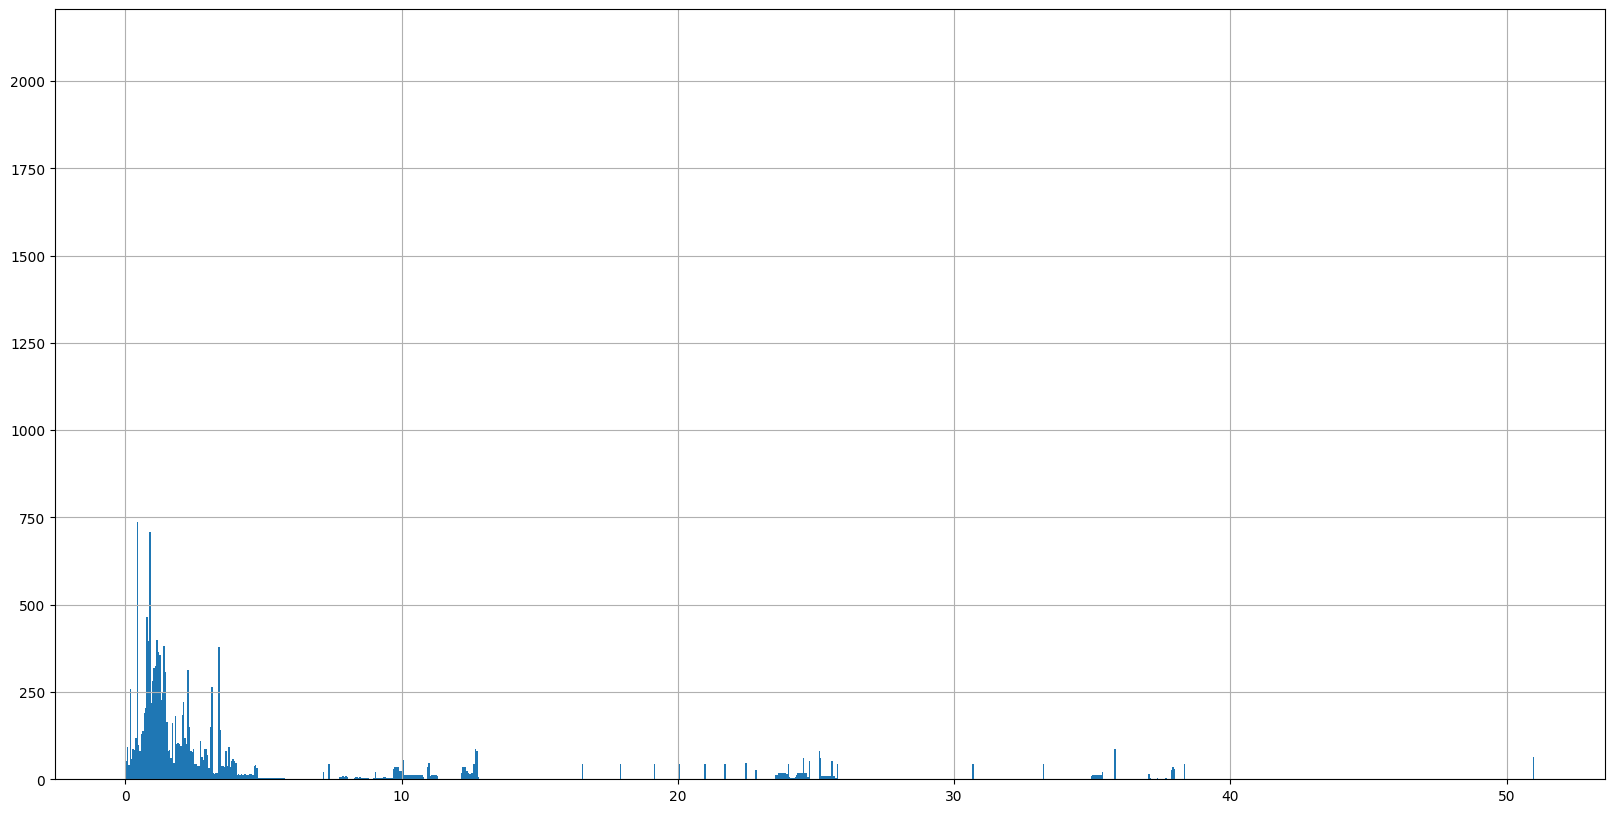

In [ ]:
plot_histogram_from_column('O2 percentage in tank 1',1000)